# [**Comparaison de divers solveurs en ligne**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_5_sgd/plot_sgd_comparison.ipynb)<br/>([_Comparing various online solvers_](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_comparison.html))

Un exemple montrant comment différents solveurs en ligne se comportent sur le jeu de données des chiffres manuscrits.

training SGD
training ASGD
training Perceptron
training Passive-Aggressive I
training Passive-Aggressive II
training SAG


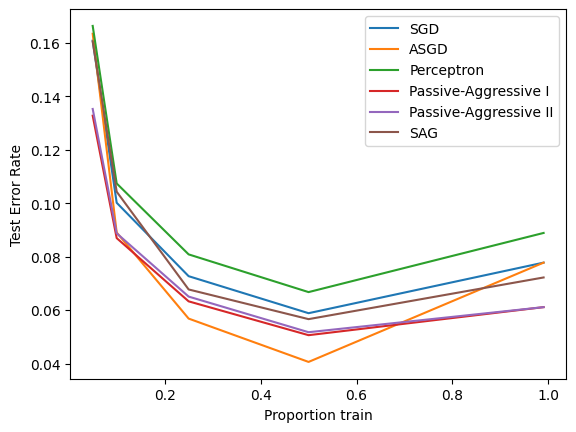

In [1]:
# Author: Rob Zinkov <rob at zinkov dot com>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import (
    LogisticRegression,
    PassiveAggressiveClassifier,
    Perceptron,
    SGDClassifier,
)
from sklearn.model_selection import train_test_split

held_out = [0.95, 0.90, 0.75, 0.50, 0.01]
# Number of rounds to fit and evaluate an estimator.
rounds = 10
X, y = datasets.load_digits(return_X_y=True)

classifiers = [
    ("SGD", SGDClassifier(max_iter=110)),
    ("ASGD", SGDClassifier(max_iter=110, average=True)),
    ("Perceptron", Perceptron(max_iter=110)),
    (
        "Passive-Aggressive I",
        PassiveAggressiveClassifier(max_iter=110, loss="hinge", C=1.0, tol=1e-4),
    ),
    (
        "Passive-Aggressive II",
        PassiveAggressiveClassifier(
            max_iter=110, loss="squared_hinge", C=1.0, tol=1e-4
        ),
    ),
    (
        "SAG",
        LogisticRegression(max_iter=110, solver="sag", tol=1e-1, C=1.0e4 / X.shape[0]),
    ),
]

xx = 1.0 - np.array(held_out)

for name, clf in classifiers:
    print(f"training {name}")
    rng = np.random.RandomState(42)
    yy = []
    for i in held_out:
        yy_ = []
        for _ in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=i, random_state=rng
            )
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()